ESERCIZIO: utilizzando il seguente dataset make_moons(n_samples=100, shuffle=True, noise = 0.2, random_state=6) 
1. fai il training di un albero decisionale senza definire la profondità massima;
2. disegna l'albero;
3. disegna il grafico dividendo in aree;
4. leggendo la documentazione (https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html)
 trova il modo di stampare quanto è profondo l'albero e il numero di foglie;

In [1]:
from sklearn.datasets import make_moons
import numpy as np
import matplotlib.pyplot as plt


X,y = make_moons(n_samples=100, shuffle=True, noise = 0.2, random_state=6)

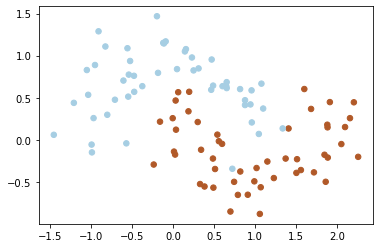

In [4]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.Paired)

plt.show()

In [3]:
from sklearn.tree import DecisionTreeClassifier

tree_clf = DecisionTreeClassifier()
tree_clf.fit(X,y)

DecisionTreeClassifier()

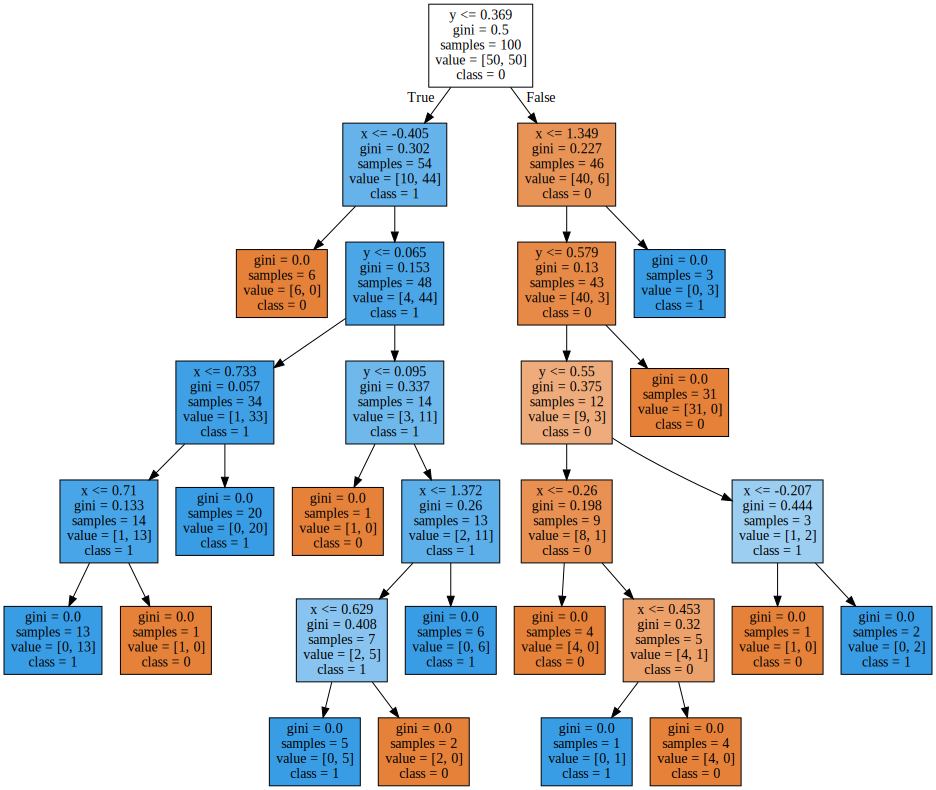

In [5]:
from sklearn.tree import export_graphviz 
import os
import graphviz

dot_data = export_graphviz(tree_clf, out_file=None, 
                      feature_names=['x','y'],  
                      class_names=['0','1'],  
                      filled=True)  
graph = graphviz.Source(dot_data)  
graph 

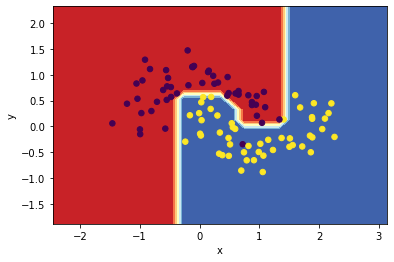

In [6]:
import numpy as np

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

plot_step = 0.2

# Griglia di punti
xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))
Z = tree_clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)
cs = plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu)

plt.scatter(X[:, 0], X[:, 1], c=y, s=30)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [7]:
tree_clf.get_depth()

6

In [8]:
tree_clf.get_n_leaves()

15

In [11]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(tree_clf, X, y, cv = 10, scoring = "accuracy")
print(scores)
print(scores.mean())
print(scores.std())

[0.8 0.9 0.9 0.8 0.9 0.8 0.9 0.9 0.8 0.9]
0.86
0.04898979485566355


In [9]:
from sklearn.metrics import accuracy_score
accuracy_score(y, tree_clf.predict(X))

1.0